# Asymptotic Behavior In Polarized T2 Symmetric Vacuum Spacetimes by Isenberg and Kichenassamy
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 19, 2022

https://arxiv.org/abs/1709.09715

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [14]:
t,theta,x,y,dt,dtheta,dx,dy,Lambda = symbols('t theta x y dt dtheta dx dy lambda')

In [4]:
u = Function('u')(t,theta)
u

In [5]:
nu = Function('nu')(t,theta)
nu

In [6]:
alpha = Function('alpha')(t,theta)
alpha

In [7]:
G1 = Function('G_1')(t,theta)
G1

In [8]:
M1 = Function('M_1')(t,theta)
M1

In [9]:
G2 = Function('G_2')(t,theta)
G2

In [10]:
M2 = Function('M_2')(t,theta)
M2

In [11]:
variables = Matrix([t,theta,x,y])
variables

⎡t⎤
⎢ ⎥
⎢θ⎥
⎢ ⎥
⎢x⎥
⎢ ⎥
⎣y⎦

In [12]:
differentials = Matrix([dt,dtheta,dx,dy])
differentials 

⎡  dt  ⎤
⎢      ⎥
⎢dtheta⎥
⎢      ⎥
⎢  dx  ⎥
⎢      ⎥
⎣  dy  ⎦

In [21]:
lineElement1 = expand(exp(2*(nu-u)) * (-alpha * dt**2 + dtheta**2) + Lambda * (exp(2*u)) * (dx + G1 * dtheta + M1 * dt)**2 + Lambda*exp(-2*u)*t**2 * (dy + G2*dtheta + M2 * dt)**2)
lineElement1

In [23]:
lineElement = lineElement1.subs(k,0).subs(alpha,1).subs(G1,0).subs(G2,0).subs(M1,0).subs(M2,0)
lineElement

In [24]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅ν(t, θ)  -2⋅u(t, θ)                                                        ⎤
⎢-ℯ         ⋅ℯ                      0                  0               0        ⎥
⎢                                                                               ⎥
⎢                          2⋅ν(t, θ)  -2⋅u(t, θ)                                ⎥
⎢           0             ℯ         ⋅ℯ                 0               0        ⎥
⎢                                                                               ⎥
⎢                                                    2⋅u(t, θ)                  ⎥
⎢           0                       0             λ⋅ℯ                  0        ⎥
⎢                                                                               ⎥
⎢                                                                  2  -2⋅u(t, θ)⎥
⎣           0                       0                  0        λ⋅t ⋅ℯ          ⎦

In [25]:
import sympy

In [26]:
m = sympy.Array(g)
m

⎡  2⋅ν(t, θ)  -2⋅u(t, θ)                                                        ⎤
⎢-ℯ         ⋅ℯ                      0                  0               0        ⎥
⎢                                                                               ⎥
⎢                          2⋅ν(t, θ)  -2⋅u(t, θ)                                ⎥
⎢           0             ℯ         ⋅ℯ                 0               0        ⎥
⎢                                                                               ⎥
⎢                                                    2⋅u(t, θ)                  ⎥
⎢           0                       0             λ⋅ℯ                  0        ⎥
⎢                                                                               ⎥
⎢                                                                  2  -2⋅u(t, θ)⎥
⎣           0                       0                  0        λ⋅t ⋅ℯ          ⎦

In [27]:
from einsteinpy.symbolic import *

In [30]:
syms = sympy.symbols("t theta x y")
t,theta,x,y = syms

In [29]:
metric = MetricTensor(m,syms)

In [31]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡∂             ∂                                                                           
⎢⎢──(ν(t, θ)) - ──(u(t, θ))              0                                0                 
⎢⎢∂t            ∂t                                                                          
⎢⎢                                                                                          
⎢⎢                           ∂             ∂                                                
⎢⎢            0              ──(ν(t, θ)) - ──(u(t, θ))                    0                 
⎢⎢                           ∂t            ∂t                                               
⎢⎢                                                                                          
⎢⎢                                                         -2⋅ν(t, θ) + 4⋅u(t, θ) ∂         
⎢⎢            0                          0              λ⋅ℯ                      ⋅──(u(t, θ)
⎢⎢                                                                    

In [32]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡  ⎛    2                           2     2         ⎞                                       
⎢  ⎜   ∂               ⎛∂          ⎞     ∂          ⎟   ∂             ∂                     
⎢t⋅⎜- ───(ν(t, θ)) - 2⋅⎜──(u(t, θ))⎟  + ───(u(t, θ))⎟ + ──(ν(t, θ)) + ──(u(t, θ))           
⎢  ⎜    2              ⎝∂t         ⎠      2         ⎟   ∂t            ∂t                    
⎢  ⎝  ∂t                                ∂t          ⎠                                       
⎢────────────────────────────────────────────────────────────────────────────────           
⎢                                       t                                                   
⎢                                                                                           
⎢                                                                                           
⎢                                                                                    2      
⎢                                                                     

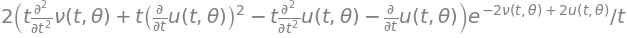

In [33]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [34]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡  ⎛    2                           2     2         ⎞                                   ⎛   
⎢  ⎜   ∂               ⎛∂          ⎞     ∂          ⎟   ∂             ∂                 ⎜   
⎢t⋅⎜- ───(ν(t, θ)) - 2⋅⎜──(u(t, θ))⎟  + ───(u(t, θ))⎟ + ──(ν(t, θ)) + ──(u(t, θ))   1.0⋅⎜t⋅─
⎢  ⎜    2              ⎝∂t         ⎠      2         ⎟   ∂t            ∂t                ⎜   
⎢  ⎝  ∂t                                ∂t          ⎠                                   ⎝  ∂
⎢──────────────────────────────────────────────────────────────────────────────── + ────────
⎢                                       t                                                   
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [35]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [36]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [37]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified 

⎡    ⎛  2                           2     2         ⎞                                       
⎢    ⎜ ∂               ⎛∂          ⎞     ∂          ⎟   ∂             ∂                     
⎢- t⋅⎜───(ν(t, θ)) + 2⋅⎜──(u(t, θ))⎟  - ───(u(t, θ))⎟ + ──(ν(t, θ)) + ──(u(t, θ))           
⎢    ⎜  2              ⎝∂t         ⎠      2         ⎟   ∂t            ∂t                    
⎢    ⎝∂t                                ∂t          ⎠                                       
⎢────────────────────────────────────────────────────────────────────────────────           
⎢                                       t                                                   
⎢                                                                                           
⎢                                                                                    ⎛  2   
⎢                                                                                    ⎜ ∂    
⎢                                                                     

In [38]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                       ∂                                                                   
⎢               2   1.0⋅──(ν(t, θ))                                                         
⎢  ⎛∂          ⎞        ∂t                                                                  
⎢- ⎜──(u(t, θ))⎟  + ───────────────                  0                                      
⎢  ⎝∂t         ⎠           t                                                                
⎢                                                                                           
⎢                                                           ∂                               
⎢                                                   2   1.0⋅──(ν(t, θ))                     
⎢                                      ⎛∂          ⎞        ∂t                              
⎢                0                   - ⎜──(u(t, θ))⎟  + ───────────────                     
⎢                                      ⎝∂t         ⎠           t      